<a href="https://colab.research.google.com/github/alejandramcr/Financial_Fraud_Detection/blob/main/Fase_1_Plantilla_Financial_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




BootcampXperience, prof Alejo / mayo 2024

Alejandra Cruz R.

Fase 1 con dataset inicial

La urgencia por detectar fraudes en transacciones móviles de dinero ha llevado a una empresa del segmento Fintech a buscar soluciones innovadoras. Como científicos de datos hemos sido convocados para desarrollar un modelo de machine learning que pueda distinguir de manera precisa entre transacciones legítimas y fraudulentas, estableciendo así un estándar de seguridad en el sector financiero móvil global.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la detección de transacciones bancarias fraudulentas.

#**1. Configuración del Ambiente**


---




In [ ]:
#**
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
!pip install -U imbalanced-learn
!pip install ydata-profiling
!pip install catboost
from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=fde7173d4e86b83f430d509717dd5aa61d459800516cdb8ce095237d655e5403
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


#**2. Preprocesamiento de Datos**


---


In [ ]:
#***
df_banco = pd.read_csv("https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/fraud_dataset_example.csv")
df_banco.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


La función info() en Pandas se utiliza para imprimir un resumen de información sobre un DataFrame.Esta función es útil para obtener una visión general rápida de la estructura y los datos contenidos en el DataFrame df_banco.

In [ ]:
#***
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


Insigths: 3 variables categóricas, 'type', 'nameOrig', 'nameDest'

**Variables del dataset**

step - mapea una unidad de tiempo en el mundo real. En este caso 1 paso, es 1 hora de tiempo. Total de pasos 744 (simulación de 30 días).

type - tipo de de transacción, CASH-IN, CASH-OUT, DEBIT, PAYMENT y TRANSFER.

importe - importe de la transacción en moneda local.

nameOrig - cliente que inició la transacción.

oldbalanceOrg - saldo inicial antes de la transacción

newbalanceOrg - nuevo saldo después de la transacción

nameDest - cliente destinatario de la transacción

oldbalanceDest - destinatario del saldo inicial antes de la transacción. Tenga en cuenta que no hay información para los clientes que empiezan por M (Comerciantes).

newbalanceDest - nuevo destinatario del saldo después de la transacción. Tenga en cuenta que no hay información para los clientes que empiezan por M (Comerciantes).

isFraud - Se trata de las transacciones realizadas por los agentes fraudulentos dentro de la simulación. En este conjunto de datos específico, el comportamiento fraudulento de los agentes tiene como objetivo obtener beneficios tomando el control de las cuentas de los clientes e intentando vaciar los fondos transfiriéndolos a otra cuenta y luego sacándolos del sistema.

isFlaggedFraud - El modelo de negocio pretende controlar las transferencias masivas de una cuenta a otra y señala los intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en una sola transacción.


Tipo de de transacción:

**CASH-IN y CASH-OUT** se relacionan con depósitos y retiros en efectivo, respectivamente. **DEBIT** implica cargos o pagos utilizando una tarjeta de débito o transferencia directa. **PAYMENT** se refiere a liquidar una deuda. Y **TRANSFER** es el acto de mover dinero entre cuentas.

La función tail() en Pandas se utiliza para mostrar las últimas filas de un DataFrame (quitar)

In [ ]:
df_banco.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
101608,10,PAYMENT,7477.02,C513257306,785.00,0.0,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.0,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.0,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.0,C1631408038,541639.43,2186953.43,0,0
101612,10,CASH_OUT,469539.21,C515691325,31133.00,0.0,C1383702768,0.00,469539.21,0,0


In [ ]:
df_banco['type'].value_counts()

type
PAYMENT     40062
CASH_OUT    31310
CASH_IN     20540
TRANSFER     8689
DEBIT        1012
Name: count, dtype: int64

In [ ]:
df_banco.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

<Axes: >

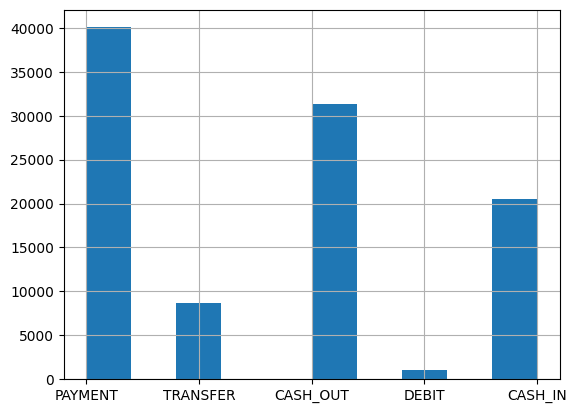

In [ ]:
df_banco['type'].hist()

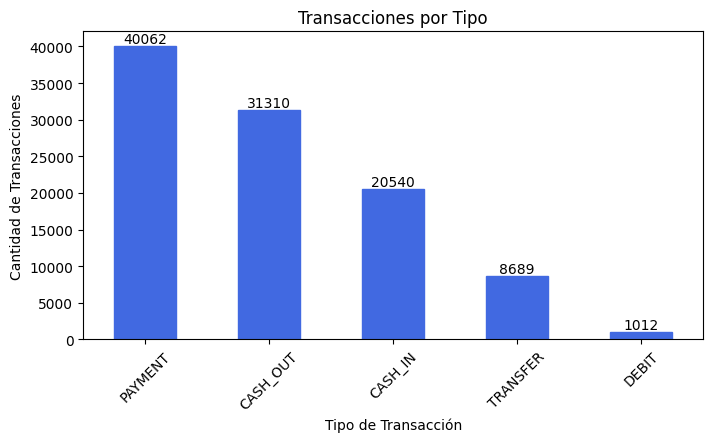

In [ ]:
# Gráfico de barras acumuladas de las transacciones type
plt.figure(figsize=(8, 4))
counts = df_banco['type'].value_counts()
df_banco['type'].value_counts().plot(kind='bar', color='RoyalBlue', edgecolor='RoyalBlue')

# Agregar etiquetas de texto a cada barra
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Transacciones por Tipo')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_banco.groupby(['type','isFraud'])['isFraud'].count()

type      isFraud
CASH_IN   0          20540
CASH_OUT  0          31251
          1             59
DEBIT     0           1012
PAYMENT   0          40062
TRANSFER  0           8632
          1             57
Name: isFraud, dtype: int64

Segun este resultado los fraudes se presentan en los tipos de transacciones CASH_OUT y TRANSFER para un total de 116 fraudes




Contar la cantidad de Fraudes detectados en este dataframe

In [ ]:
df_banco['isFraud'].value_counts()

isFraud
0    101497
1       116
Name: count, dtype: int64

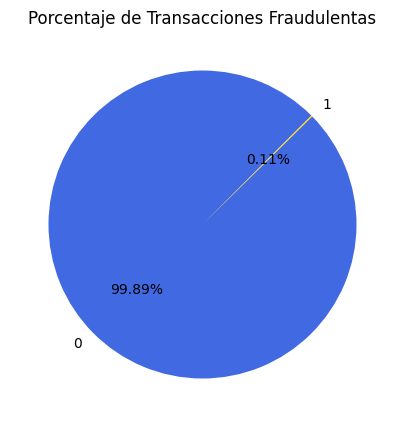

In [ ]:
# Datos de la variable isFraud
counts = df_banco['isFraud'].value_counts()

# Crear un gráfico circular
plt.figure(figsize=(8, 5))
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=['RoyalBlue', 'gold'], startangle=45)
plt.title('Porcentaje de Transacciones Fraudulentas')
plt.show()

En estos resultados se observa que Los fraudes representan solo el 0.13% del total lo que representan un desbalance de las clases y nos puede arrojar valores erroneos. Es por ello que se debe aplicar una tecnica para balancear la clase.

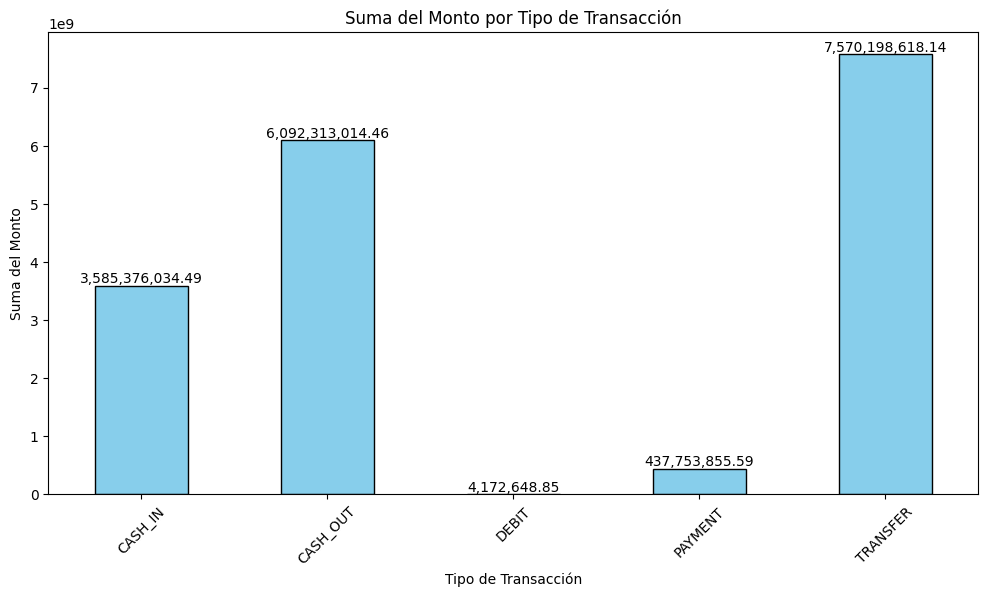

In [ ]:
# Calcular la suma del monto por tipo de transacción
monto_por_tipo = df_banco.groupby('type')['amount'].sum()

# Crear un gráfico de barras para mostrar la suma del monto por tipo de transacción
plt.figure(figsize=(12, 6))
bar_plot = monto_por_tipo.plot(kind='bar', color='skyblue', edgecolor='black')

# Agregar etiquetas de texto con el total de cada columna
for i, total in enumerate(monto_por_tipo):
    bar_plot.text(i, total, f"{total:,.2f}", ha='center', va='bottom')

# Agregar etiquetas y título
plt.title('Suma del Monto por Tipo de Transacción')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Suma del Monto')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Insigths : Se observa que la mayor cantidad de dinero se manejan en los tipos cash-out y transfer, que ademas son los tipos donde se refleja inicialmente los fraudes.


In [ ]:
# Valores únicos de 'type'
df_banco['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
# Valores únicos de 'step'
df_banco['step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
df_banco.describe()

**Tratamiento y trasnformacion de los datos**

En este paso vamos a realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas, etc.
Crea una función **procesar_datos()**, dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

•	Crea una nueva variable: Crea una nueva variable llamada **type2** y llénalo con la combinación de la primera letra de las columnas **nameOrig** y **nameDest**.

•	**One Hot Encoding**: Lleva los valores de las columnas **type** y **type2** a nuevas columnas del dataframe, llénalos con 1 ó 0 según corresponda, puedes usar el método get_dummies.

•	Elimina columnas prescindibles: Elimina las columnas del dataframe que ya no vamos a utilizar: ['nameOrig', 'nameDest', 'isFlaggedFraud','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

•	Elimina duplicados: Elimina todos los registros duplicados con el método drop_duplicates() y guarda el resultado en la variable global df_banco.

•	Tratamiento de nulos: Trata todos los registros cuyo valor sea nulo, elimina todos los registros o substituye el valor nulo encontrado, continúa guardando el resultado en df_banco.


In [ ]:
#***
#@title('Procesar datos')
#Funcion procesar datos
def procesar_datos():
    global df_banco
    global resultados

    # Se crea una nueva variable 'type2' con la combinación de la primera letra de 'nameOrig' y 'nameDest'
    df_banco['type2'] = df_banco['nameOrig'].str[0] + df_banco['nameDest'].str[0]

    # One Hot Encoding para 'type' y 'type2'
    df_banco = pd.get_dummies(df_banco, columns=['type', 'type2'])

    # Aseguramos que las columnas binarias tengan solo 0 y 1 utilizando astype
    columnas_binarias = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'type2_CC', 'type2_CM']
    df_banco[columnas_binarias] = df_banco[columnas_binarias].astype(int)

    # Elimino las columnas prescindibles
    columnas_eliminar = ['nameOrig', 'nameDest', 'isFlaggedFraud', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
    df_banco = df_banco.drop(columns=columnas_eliminar)

    # Elimino los registros duplicados
    df_banco = df_banco.drop_duplicates()

    # Elimino los registros nulos
    df_banco = df_banco.dropna()  # Eliminar registros con valores nulos

    # Actualizar la variable global df_banco
    resultados = df_banco



In [ ]:
# ***
# Llamar a la función para procesar los datos
procesar_datos()
df_banco.head()

,step,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CC,type2_CM
0,1,9839.64,0,0,0,0,1,0,0,1
1,1,1864.28,0,0,0,0,1,0,0,1
2,1,181.00,1,0,0,0,0,1,1,0
3,1,181.00,1,0,1,0,0,0,1,0
4,1,11668.14,0,0,0,0,1,0,0,1


In [ ]:
#***
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101518 entries, 0 to 101612
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   step           101518 non-null  int64  
 1   amount         101518 non-null  float64
 2   isFraud        101518 non-null  int64  
 3   type_CASH_IN   101518 non-null  int64  
 4   type_CASH_OUT  101518 non-null  int64  
 5   type_DEBIT     101518 non-null  int64  
 6   type_PAYMENT   101518 non-null  int64  
 7   type_TRANSFER  101518 non-null  int64  
 8   type2_CC       101518 non-null  int64  
 9   type2_CM       101518 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 8.5 MB


#**3. Exploración de Datos**


---


La función **ProfileReport(df_banco)** se utiliza para realizar un análisis exhaustivo de un DataFrame, proporcionando información detallada sobre las variables, estadísticas descriptivas, correlaciones, valores faltantes y una muestra de los datos. Al llamar a esta función con un DataFrame como argumento, se generará un informe que incluye secciones como:
Resumen general del DataFrame.


Detalles de las variables presentes en el DataFrame, incluyendo tipos de datos, valores únicos y valores faltantes.
Análisis de correlaciones entre las variables, utilizando coeficientes de correlación de Pearson y Spearman.
Información sobre valores faltantes en el DataFrame.
Muestra de los primeros y últimos registros del DataFrame.

In [ ]:
# Count the occurrences of fraud and no fraud and print them
occ = df_banco['isFraud'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df_banco))
print(df_banco['isFraud'])

In [ ]:
#***
ProfileReport(df_banco)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Balanceamento de clases**


•	La variable objetivo **isFraud** no se encuentra balanceada, para obtener mejores resultados debemos intentamos balancear esta clase.


•	Uno de los métodos a utilizar es **SMOTE** para generar registros artificiales de la clase minoritaria, se ejecuta este método y se genera una base de datos balanceada en la variable isFraud.


•	Se eliminan registros duplicados que hayan podido generarse en este último paso.


In [ ]:
#***
#@title("Balanceo de clases en el DataFrame df_banco")
def balanceo_clases():
    global df_banco
    global resultados

    # Separar las características (X) y la variable objetivo (y)
    X = df_banco.drop('isFraud', axis=1)
    y = df_banco['isFraud']

    # Aplicar SMOTE para generar registros artificiales de la clase minoritaria
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Crear un nuevo DataFrame balanceado
    df_banco_balanceado = pd.concat([X_resampled, y_resampled], axis=1)

    # Eliminar registros duplicados
    df_banco_balanceado = df_banco_balanceado.drop_duplicates()

    # Actualizar la variable global df_banco
    df_banco = df_banco_balanceado
    resultados = df_banco

    print("Balanceo de clases completado.")

In [ ]:
#***
balanceo_clases()
ProfileReport(df_banco)

Balanceo de clases completado.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**4. Construcción de Modelos**


---


In [ ]:
#***
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from catboost import CatBoostClassifier

#@title("Creación de modelos de Machine Learning")
def crea_modelos():
    global df_banco
    global resultados

    # Separar en bases de entrenamiento y prueba
    y = df_banco['isFraud']
    x = df_banco.drop(columns='isFraud')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=77)

    # Listas para almacenar los resultados de cada modelo
    nombre_modelo = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    auc_roc_scores = []

    # Modelo 1: Regresión Logística
    model = LogisticRegression()
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy_scores.append(accuracy_score(test_y, predictions))
    precision_scores.append(precision_score(test_y, predictions))
    recall_scores.append(recall_score(test_y, predictions))
    f1_scores.append(f1_score(test_y, predictions))
    auc_roc_scores.append(roc_auc_score(test_y, predictions))
    nombre_modelo.append('Regresión Logística')

    # Modelo 2: Árbol de Decisión
    model = DecisionTreeClassifier()
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy_scores.append(accuracy_score(test_y, predictions))
    precision_scores.append(precision_score(test_y, predictions))
    recall_scores.append(recall_score(test_y, predictions))
    f1_scores.append(f1_score(test_y, predictions))
    auc_roc_scores.append(roc_auc_score(test_y, predictions))
    nombre_modelo.append('Árbol de Decisión')

    # Modelo 3: Random Forest
    model = RandomForestClassifier()
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy_scores.append(accuracy_score(test_y, predictions))
    precision_scores.append(precision_score(test_y, predictions))
    recall_scores.append(recall_score(test_y, predictions))
    f1_scores.append(f1_score(test_y, predictions))
    auc_roc_scores.append(roc_auc_score(test_y, predictions))
    nombre_modelo.append('Random Forest')

    # Modelo 4: Naive Bayes
    model = GaussianNB()
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy_scores.append(accuracy_score(test_y, predictions))
    precision_scores.append(precision_score(test_y, predictions))
    recall_scores.append(recall_score(test_y, predictions))
    f1_scores.append(f1_score(test_y, predictions))
    auc_roc_scores.append(roc_auc_score(test_y, predictions))
    nombre_modelo.append('Naive Bayes')

    # Modelo 5: Balanced Random Trees (BRTs)
    model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=77)
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy_scores.append(accuracy_score(test_y, predictions))
    precision_scores.append(precision_score(test_y, predictions))
    recall_scores.append(recall_score(test_y, predictions))
    f1_scores.append(f1_score(test_y, predictions))
    auc_roc_scores.append(roc_auc_score(test_y, predictions))
    nombre_modelo.append('Balanced Random Trees (BRTs)')

    # Modelo 6: CatBoost
    model = CatBoostClassifier()
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy_scores.append(accuracy_score(test_y, predictions))
    precision_scores.append(precision_score(test_y, predictions))
    recall_scores.append(recall_score(test_y, predictions))
    f1_scores.append(f1_score(test_y, predictions))
    auc_roc_scores.append(roc_auc_score(test_y, predictions))
    nombre_modelo.append('CatBoost')



    # Crear un diccionario con los resultados
    resultados = {
        'Nombre_Modelo': nombre_modelo,
        'Accuracy': accuracy_scores,
        'Precision': precision_scores,
        'Recall': recall_scores,
        'F1_Score': f1_scores,
        'AUC_ROC': auc_roc_scores
    }

    print("Creación de modelos completada.")



In [ ]:
# ***
#Llamar a la función para crear los modelos
crea_modelos()

Learning rate set to 0.08198
0:	learn: 0.5320836	total: 28.5ms	remaining: 28.4s
1:	learn: 0.4181781	total: 54.3ms	remaining: 27.1s
2:	learn: 0.3503738	total: 79.2ms	remaining: 26.3s
3:	learn: 0.2840272	total: 107ms	remaining: 26.6s
4:	learn: 0.2575719	total: 136ms	remaining: 27s
5:	learn: 0.2295750	total: 161ms	remaining: 26.7s
6:	learn: 0.2170222	total: 192ms	remaining: 27.2s
7:	learn: 0.2063337	total: 218ms	remaining: 27s
8:	learn: 0.1938893	total: 243ms	remaining: 26.7s
9:	learn: 0.1853875	total: 269ms	remaining: 26.6s
10:	learn: 0.1785099	total: 294ms	remaining: 26.5s
11:	learn: 0.1709840	total: 320ms	remaining: 26.3s
12:	learn: 0.1643367	total: 346ms	remaining: 26.3s
13:	learn: 0.1523937	total: 371ms	remaining: 26.1s
14:	learn: 0.1490543	total: 401ms	remaining: 26.3s
15:	learn: 0.1447349	total: 426ms	remaining: 26.2s
16:	learn: 0.1424427	total: 451ms	remaining: 26.1s
17:	learn: 0.1405208	total: 476ms	remaining: 25.9s
18:	learn: 0.1379199	total: 503ms	remaining: 26s
19:	learn: 0.13

In [ ]:
#***
for i, model in enumerate(resultados['Nombre_Modelo']):
    print(f"Modelo: {model}")
    print(f"Accuracy: {resultados['Accuracy'][i]}")
    print(f"Precisión: {resultados['Precision'][i]}")
    print(f"Recall: {resultados['Recall'][i]}")
    print(f"F1-score: {resultados['F1_Score'][i]}")
    print(f"AUC-ROC: {resultados['AUC_ROC'][i]}\n")

Modelo: Regresión Logística
Accuracy: 0.44929559588780305
Precisión: 0.44929559588780305
Recall: 1.0
F1-score: 0.6200192661353884
AUC-ROC: 0.5

Modelo: Árbol de Decisión
Accuracy: 0.973093032110674
Precisión: 0.9680543277344692
Recall: 0.9721953188054883
F1-score: 0.9701204043007288
AUC-ROC: 0.9730103779356517

Modelo: Random Forest
Accuracy: 0.9732743459104672
Precisión: 0.9681423750602604
Recall: 0.9725181598062954
F1-score: 0.9703253341923016
AUC-ROC: 0.9732047224145888

Modelo: Naive Bayes
Accuracy: 0.5983174079379181
Precisión: 0.7603092783505154
Recall: 0.15476190476190477
F1-score: 0.2571754291845494
AUC-ROC: 0.5574784073574116

Modelo: Balanced Random Trees (BRTs)
Accuracy: 0.9733831341903433
Precisión: 0.9683005222981117
Recall: 0.9725988700564971
F1-score: 0.9704449365814375
AUC-ROC: 0.9733109254967569

Modelo: CatBoost
Accuracy: 0.9769550160462713
Precisión: 0.9673200015902675
Recall: 0.9818805488297013
F1-score: 0.9745458914946027
AUC-ROC: 0.9774085192375551



#**5. Evaluación y Selección del Modelo**


---


En este último paso vamos a evaluar los modelos utilizando las métricas obtenidas en el paso anterior y seleccionar el modelo con el mejor rendimiento. Crea una **función visualiza_resultados()**, dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

In [ ]:
#Crear DataFrame a partir de diccionario:
#En este paso vamos a transformar nuestro diccionario resultados generado en el paso anterior a un Dataframe, el cual vamos a utilizar para la visualización.
results_df = pd.DataFrame(resultados)
results_df.set_index('Nombre_Modelo', inplace=True)


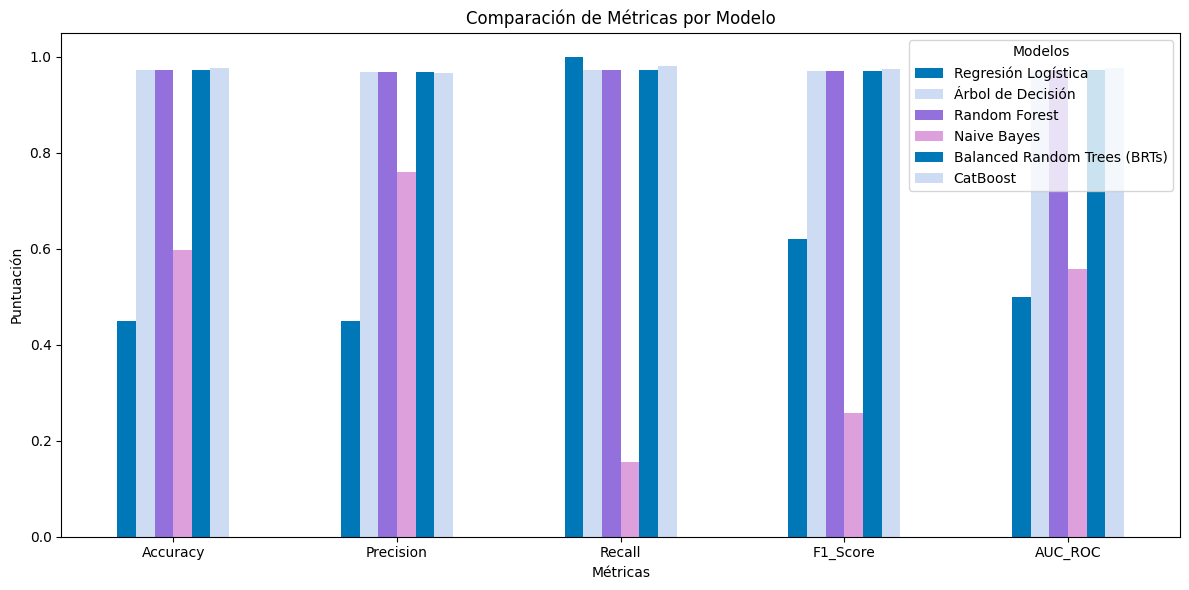

In [ ]:
#Visualización:
#Finalmente, vamos a realizar la transpuesta de este Dataframe results_df para una mejor visualización, y posteriormente generar una gráfico de barras para evaluar nuestros modelos, de esta forma:
results_df = results_df.T
colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
plt.title('Comparación de Métricas por Modelo')
plt.xlabel('Métricas')
plt.ylabel('Puntuación')
plt.legend(title='Modelos')
plt.tight_layout()
plt.show()


**Selección del Modelo:**


Tras analizar los resultados, se destaca que tanto el modelo de Random Forest como el Árbol de Decisión exhiben un rendimiento superior en la detección de fraudes en comparación con la Regresión Logística y Naive Bayes. Estos modelos ofrecen una combinación sólida de precisión y sensibilidad, lo que los posiciona como opciones efectivas para la detección de fraudes en este escenario específico. Ambos modelos destacan por su alto rendimiento en términos de precisión, recall, F1-score y AUC-ROC, lo que respalda su recomendación para la tarea de clasificación de transacciones fraudulentas.

De los dos, destaca el **El Random Forest**, debido a su rendimiento, su capacidad para manejar conjuntos de datos complejos y alta precisión.

Adicional a esto es un modelo robusto cen casos de sobreajuste (overfitting) y útil para identificar interacciones entre variables.
